# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attemptto nuild a machine
learning model capable of predicting whether or npt someone has heart disease based on their medical attributes.

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1.problem definition

In a statement ,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data
heart_diesease csv file from laggle or UCI

## 3.Evaluation
> If we can reach 95%accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

**Create data dictionary**

*age. The age of the patient.
*sex. The gender of the patient. (1 = male, 0 = female).
*cp. Type of chest pain. (1 = typical angina, 2 = atypical angina, 3 = non — anginal pain, 4 = asymptotic).
*trestbps. Resting blood pressure in mmHg.
*chol. Serum Cholestero in mg/dl.
*fbs. Fasting Blood Sugar. (1 = fasting blood sugar is more than 120mg/dl, 0 = otherwise).
*restecg. Resting ElectroCardioGraphic results (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hyperthrophy).
*thalach. Max heart rate achieved.
*exang. Exercise induced angina (1 = yes, 0 = no).
*oldpeak. ST depression induced by exercise relative to rest.
*slope. Peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping).
*ca. Number of major vessels (0–3) colored by flourosopy.
*thal. Thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect).
*num. Diagnosis of heart disease (0 = absence, 1, 2, 3, 4 = present).



## 5. Preparing the tools
We're going to use numpy, pandas ,matplotlifor data anlysis and manipulation. 

In [1]:
# Importall the tools we need

#Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evlauation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

In [2]:
df = pd.read_csv("heart-disease.csv")

In [3]:
df.shape

(303, 14)

## Data Exploration (exploratory data analysis or EDA)



In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#How many of each class are there
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

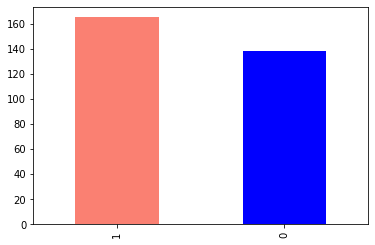

In [6]:
df["target"].value_counts().plot(kind='bar', color=['salmon', 'blue']);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#Heart disease frequemcy according to sex

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


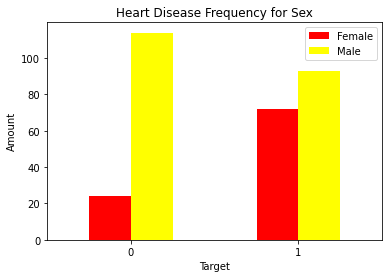

In [12]:
#Create a plot of crosstab;
pd.crosstab(df.target, df.sex).plot(kind='bar', color=['red', 'yellow']);
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Target')
plt.ylabel('Amount')
plt.legend(['Female', 'Male']);
plt.xticks(rotation=0);

### Age vs max heart rate

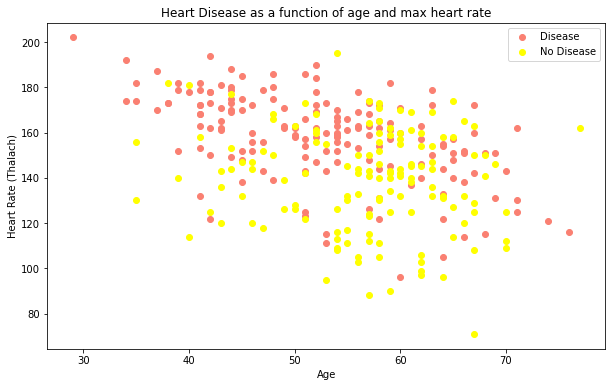

In [13]:
# Creating anothe figure
plt.figure(figsize=(10,6))

#Scatter with positive exapmles
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon");
#Scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c='yellow');

#Add some helpful info
plt.title("Heart Disease as a function of age and max heart rate")
plt.xlabel("Age")
plt.ylabel('Heart Rate (Thalach)')
plt.legend(["Disease", "No Disease"])

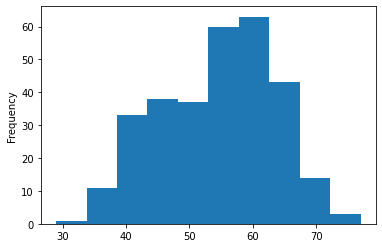

In [14]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

In [15]:
## Heart Disease per Chest Pain Type
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


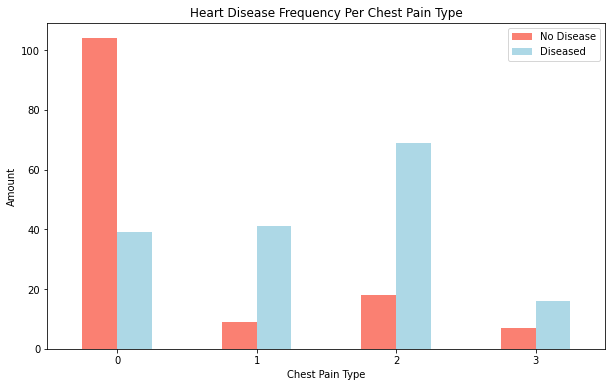

In [16]:
#Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(10,6),
                                  color=['salmon', 'lightblue'])

#Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Diseased"])
plt.xticks(rotation=0);

In [17]:
# Make a correaltion matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


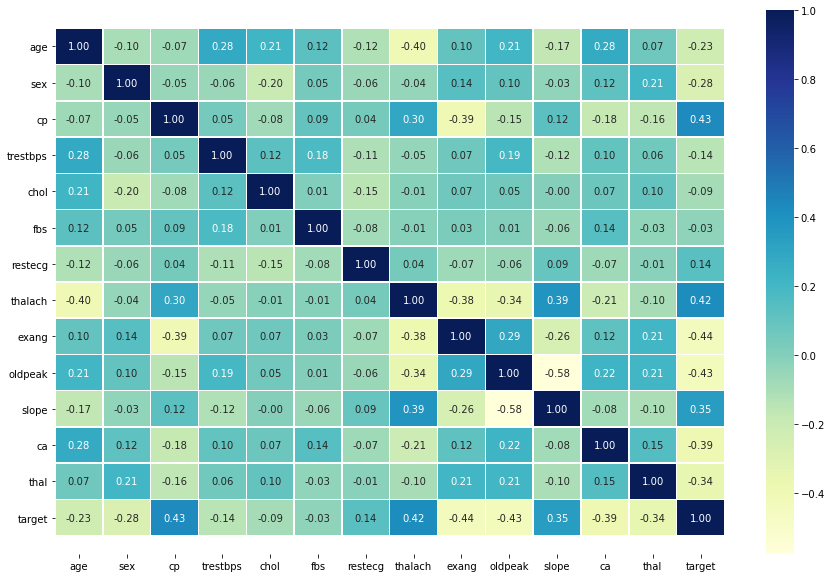

In [18]:
#Visualising coorealtoion matrix
corr_matrix = df.corr()
fig, ax= plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidth=0.5,
                fmt='.2f',
                cmap="YlGnBu")

#For adjusting heat may y axis
bottom, top = ax.get_ylim()
ax.set_ylim(bottom  + 0.5, top - 0.5);

In [19]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


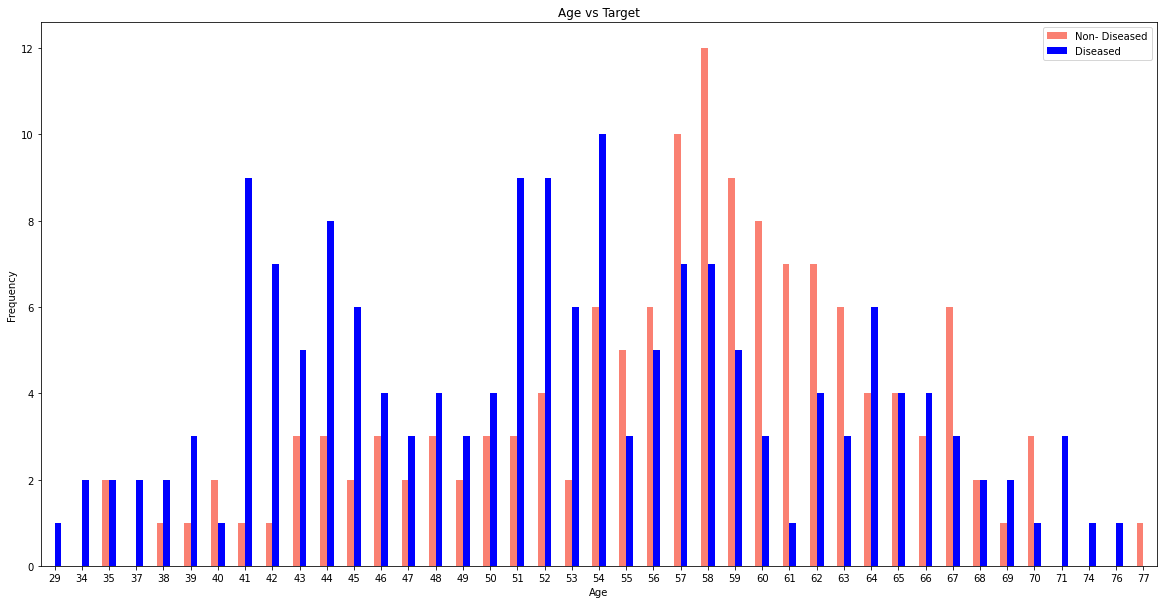

In [20]:
pd.crosstab(df.age, df.target).plot(figsize=(20,10),kind='bar', color=['salmon', 'blue'])

plt.title("Age vs Target")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend(["Non- Diseased","Diseased"])
plt.xticks(rotation=0);

## 5. Modelling

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
X = df.drop('target', axis=1)
y=df.target

In [23]:
np.random.seed(32)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Now weh've splitted data lets build a ML model

WE have chosen 3 models:
1.Logistic Regression
 2.KNN
 3.RFClassifier

In [24]:
#Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

#Create a function to fit and score model
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """Fits and evaluates given machine learning models
       models : a dict of different Scikit Learn machine learning models """
    np.random.seed(42)
    #Make a dictionary to keep model scores
    model_scores= {}
    #Loop through models
    for name, model in models.items():
        #Fit the models
        model.fit(X_train, y_train)
        #Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [25]:
model_scores= fit_and_score(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

model_scores

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.819672131147541,
 'KNN': 0.7049180327868853,
 'Random Forest': 0.8688524590163934}

## Model Comparison

<AxesSubplot:>

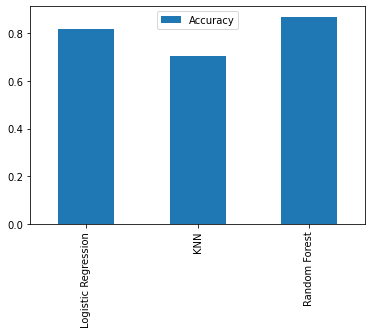

In [26]:
model_compare = pd.DataFrame(model_scores, index=['Accuracy'])
model_compare.T.plot(kind='bar')

Now we gave a baseline model.

Let's look at the following:
*Hyperparameter tuning
*Feature importance
*Confusion matrix
*Cross-validation
*Precision
*Recall
*F1 score
*Classification report
*ROC curve
*Area under the curve (AUC)

## Hyperparameter tuning by Hand

In [27]:
#Tuning of KNN

train_scores = []
test_scores = []

#Create a list of different values of n_neighbors
neighbors= range(1,21)

#Setup KNN insatnce
knn = KNeighborsClassifier()

#Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    #Fit the algorithm
    knn.fit(X_train , y_train)
    
    #Update the training score list
    train_scores.append(knn.score(X_train, y_train))
    #Update the test score list
    test_scores.append(knn.score(X_test, y_test))

In [28]:
train_scores

[1.0,
 0.7892561983471075,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.7479338842975206,
 0.7396694214876033,
 0.6983471074380165,
 0.71900826446281,
 0.7107438016528925,
 0.6942148760330579,
 0.7024793388429752,
 0.6735537190082644,
 0.6859504132231405,
 0.6776859504132231,
 0.6776859504132231,
 0.6859504132231405,
 0.6818181818181818,
 0.6818181818181818,
 0.6942148760330579]

In [29]:
test_scores

[0.7213114754098361,
 0.6229508196721312,
 0.7213114754098361,
 0.6721311475409836,
 0.7049180327868853,
 0.6557377049180327,
 0.6721311475409836,
 0.6557377049180327,
 0.639344262295082,
 0.639344262295082,
 0.6721311475409836,
 0.6557377049180327,
 0.639344262295082,
 0.6721311475409836,
 0.6721311475409836,
 0.6557377049180327,
 0.6557377049180327,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853]

maximum score on test data = 72.13%


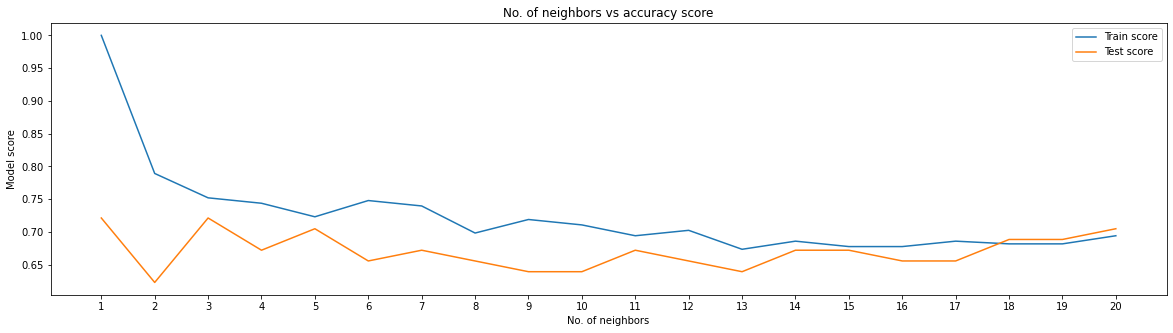

In [30]:
plt.figure(figsize=(20,5))
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")

plt.xlabel("No. of neighbors")
plt.ylabel("Model score")
plt.title("No. of neighbors vs accuracy score")
plt.legend();
plt.xticks(np.arange(1,21))
print(f"maximum score on test data = {max(test_scores)*100:.2f}%")

## Hyperprameter tuning with RandomizedSearchCV
We are going to tune :logistic regression
RandomForestClassifier
using RandomizedSearchCV

In [31]:
#Create a hyperparameter grid for LogistiRegression
log_reg_grid = {'C': np.logspace(-4,4,20),
               "solver": ["liblinear"]}

#Create a hyperparameter grid for RandomForestCLassifier
rf_grid= {"n_estimators": np.arange(10,1000,50),
         "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1,20,2)}

Now we've got hyperparameter gridssetup for each of our models, let's tune them using Randomized Search CV

In [32]:

# Tune Logistic Regression
np.random.seed(42)

#Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

#Fit random hyperparameter search model for Logisticregression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [33]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [34]:
rs_log_reg.score(X_test, y_test)

0.819672131147541

In [35]:
np.random.seed(42)
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                        cv=5,
                        n_iter=10,
                        verbose=2)
#Fitting RFClassifier 
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   1.0s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.9s
[CV] END max_dep

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=2)

In [36]:
rs_rf.best_params_

{'n_estimators': 710,
 'min_samples_split': 16,
 'min_samples_leaf': 3,
 'max_depth': 10}

In [37]:
rs_rf.score(X_test, y_test)

0.8360655737704918

### Tuning with GridSearch

In [38]:
#Tuning Linear Regression
gs_lr= GridSearchCV(LogisticRegression(),
                   param_grid=log_reg_grid,
                   verbose=False,
                   cv=5)
gs_lr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=False)

In [39]:
gs_lr.best_params_

{'C': 0.615848211066026, 'solver': 'liblinear'}

In [40]:
gs_lr.score(X_test, y_test)

0.819672131147541

In [41]:
# # Tuning LogisticRegression
# gs_rf= GridSearchCV(RandomForestClassifier(),
#                    param_grid=rf_grid,
#                    cv=5,verbose=2)

# gs_rf.fit(X,y)

Fitting 5 folds for each of 7200 candidates, totalling 36000 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.0s
[CV] END max_dep

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=760; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=810; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=810; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=810; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=810; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=810; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=860; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=860; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=860; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estim

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=560; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=610; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=610; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=610; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=610; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=610; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=660; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=660; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=660; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estim

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=360; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=410; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=410; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=410; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=410; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=410; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=460; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=460; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=460; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estim

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=160; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=210; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=210; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=210; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=210; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=210; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=260; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=260; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=260; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estim

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=960; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_esti

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=760; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=760; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=810; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=810; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=810; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=810; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=810; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=860; total time=   1.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=860; total time=   1.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=12, n_estimators=560; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=12, n_estimators=560; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=12, n_estimators=560; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=12, n_estimators=610; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=12, n_estimators=610; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=12, n_estimators=610; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=12, n_estimators=610; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=12, n_estimators=610; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=12, n_estimators=660; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=360; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=360; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=360; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=360; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=410; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=410; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=410; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=410; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=410; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=16, n_estimators=160; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=16, n_estimators=160; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=16, n_estimators=160; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=16, n_estimators=160; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=16, n_estimators=160; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=16, n_estimators=210; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=16, n_estimators=210; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=16, n_estimators=210; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=16, n_estimators=210; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=16, n_estimators=910; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=16, n_estimators=960; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=16, n_estimators=960; total time=   1.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=16, n_estimators=960; total time=   1.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=16, n_estimators=960; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=16, n_estimators=960; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=18, 

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=18, n_estimators=710; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=18, n_estimators=710; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=18, n_estimators=760; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=18, n_estimators=760; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=18, n_estimators=760; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=18, n_estimators=760; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=18, n_estimators=760; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=18, n_estimators=810; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=18, n_estimators=810; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=510; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=510; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=560; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=560; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=560; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=560; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=560; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=610; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=610; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estim

[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=4, n_estimators=310; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=4, n_estimators=310; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=4, n_estimators=360; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=4, n_estimators=360; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=4, n_estimators=360; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=4, n_estimators=360; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=4, n_estimators=360; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=4, n_estimators=410; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=4, n_estimators=410; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=4, n_estim

[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=6, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=6, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=6, n_estimators=160; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=6, n_estimators=160; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=6, n_estimators=160; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=6, n_estimators=160; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=6, n_estimators=160; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=6, n_estimators=210; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=6, n_estimators=210; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=6, n_estim

[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=6, n_estimators=910; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=6, n_estimators=910; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=6, n_estimators=960; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=6, n_estimators=960; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=6, n_estimators=960; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=6, n_estimators=960; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=6, n_estimators=960; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=8, n_estimat

[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=8, n_estimators=710; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=8, n_estimators=710; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=8, n_estimators=760; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=8, n_estimators=760; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=8, n_estimators=760; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=8, n_estimators=760; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=8, n_estimators=760; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=8, n_estimators=810; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=8, n_estimators=810; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=8, n_estim

[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=510; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=510; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=560; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=560; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=560; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=560; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=560; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=610; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=10, n_estimators=610; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=12, n_estimators=310; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=12, n_estimators=310; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=12, n_estimators=310; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=12, n_estimators=360; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=12, n_estimators=360; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=12, n_estimators=360; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=12, n_estimators=360; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=12, n_estimators=360; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=12, n_estimators=410; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=14, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=14, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=14, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=14, n_estimators=160; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=14, n_estimators=160; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=14, n_estimators=160; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=14, n_estimators=160; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=14, n_estimators=160; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=14, n_estimators=210; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=14, n_estimators=910; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=14, n_estimators=910; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=14, n_estimators=910; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=14, n_estimators=910; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=14, n_estimators=960; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=14, n_estimators=960; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=14, n_estimators=960; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=14, n_estimators=960; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=14, n_estimators=960; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=16, n_estimators=710; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=16, n_estimators=710; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=16, n_estimators=710; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=16, n_estimators=710; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=16, n_estimators=710; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=16, n_estimators=760; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=16, n_estimators=760; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=16, n_estimators=760; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=16, n_estimators=760; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=18, n_estimators=460; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=18, n_estimators=510; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=18, n_estimators=510; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=18, n_estimators=510; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=18, n_estimators=510; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=18, n_estimators=510; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=18, n_estimators=560; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=18, n_estimators=560; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=18, n_estimators=560; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=260; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=310; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=310; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=310; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=310; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=310; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=360; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=360; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=360; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estim

[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=4, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=4, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=4, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=4, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=4, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=4, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=4, n_estimators=160; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=4, n_estimators=160; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=4, n_estimators=160; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=4, n_estima

[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=4, n_estimators=860; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=4, n_estimators=910; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=4, n_estimators=910; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=4, n_estimators=910; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=4, n_estimators=910; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=4, n_estimators=910; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=4, n_estimators=960; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=4, n_estimators=960; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=4, n_estimators=960; total time=   1.8s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=4, n_estim

[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=660; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=710; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=710; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=710; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=710; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=710; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=760; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=760; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=760; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estim

[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=8, n_estimators=460; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=8, n_estimators=510; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=8, n_estimators=510; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=8, n_estimators=510; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=8, n_estimators=510; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=8, n_estimators=510; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=8, n_estimators=560; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=8, n_estimators=560; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=8, n_estimators=560; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=8, n_estim

[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=260; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=310; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=310; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=310; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=310; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=310; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=360; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=360; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=360; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=160; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=160; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=160; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=12

[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=860; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=860; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=910; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=910; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=910; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=910; total time=   1.8s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=910; total time=   1.7s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=960; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=960; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=14, n_estimators=660; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=14, n_estimators=660; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=14, n_estimators=660; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=14, n_estimators=710; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=14, n_estimators=710; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=14, n_estimators=710; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=14, n_estimators=710; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=14, n_estimators=710; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=14, n_estimators=760; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=16, n_estimators=460; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=16, n_estimators=460; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=16, n_estimators=460; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=16, n_estimators=460; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=16, n_estimators=510; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=16, n_estimators=510; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=16, n_estimators=510; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=16, n_estimators=510; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=16, n_estimators=510; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=18, n_estimators=260; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=18, n_estimators=260; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=18, n_estimators=260; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=18, n_estimators=260; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=18, n_estimators=260; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=18, n_estimators=310; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=18, n_estimators=310; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=18, n_estimators=310; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=18, n_estimators=310; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators

[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=860; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=860; total time=   1.7s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=860; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=860; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=860; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=910; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=910; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=910; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=910; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estim

[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=4, n_estimators=660; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=4, n_estimators=660; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=4, n_estimators=660; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=4, n_estimators=660; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=4, n_estimators=660; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=4, n_estimators=710; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=4, n_estimators=710; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=4, n_estimators=710; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=4, n_estimators=710; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=4, n_estim

[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=6, n_estimators=460; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=6, n_estimators=460; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=6, n_estimators=460; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=6, n_estimators=460; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=6, n_estimators=460; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=6, n_estimators=510; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=6, n_estimators=510; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=6, n_estimators=510; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=6, n_estimators=510; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=6, n_estim

[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=8, n_estimators=260; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=8, n_estimators=260; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=8, n_estimators=260; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=8, n_estimators=260; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=8, n_estimators=260; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=8, n_estimators=310; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=8, n_estimators=310; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=8, n_estimators=310; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=8, n_estimators=310; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=8, n_estim

[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=10, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=10, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=10, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=10, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=10, n_

[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=10, n_estimators=810; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=10, n_estimators=860; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=10, n_estimators=860; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=10, n_estimators=860; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=10, n_estimators=860; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=10, n_estimators=860; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=10, n_estimators=910; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=10, n_estimators=910; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=10, n_estimators=910; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=12, n_estimators=610; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=12, n_estimators=610; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=12, n_estimators=660; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=12, n_estimators=660; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=12, n_estimators=660; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=12, n_estimators=660; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=12, n_estimators=660; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=12, n_estimators=710; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=12, n_estimators=710; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=14, n_estimators=410; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=14, n_estimators=410; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=14, n_estimators=410; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=14, n_estimators=460; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=14, n_estimators=460; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=14, n_estimators=460; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=14, n_estimators=460; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=14, n_estimators=460; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=14, n_estimators=510; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=16, n_estimators=210; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=16, n_estimators=210; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=16, n_estimators=210; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=16, n_estimators=210; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=16, n_estimators=260; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=16, n_estimators=260; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=16, n_estimators=260; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=16, n_estimators=260; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=16, n_estimators=260; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=18, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=18, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=18, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=18, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=18, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=18, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=18, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=18, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=18, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=18, n_

[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=18, n_estimators=810; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=18, n_estimators=860; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=18, n_estimators=860; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=18, n_estimators=860; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=18, n_estimators=860; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=18, n_estimators=860; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=18, n_estimators=910; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=18, n_estimators=910; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=18, n_estimators=910; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=610; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=660; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=660; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=660; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=660; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=660; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=710; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=710; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=710; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estim

[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=4, n_estimators=410; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=4, n_estimators=460; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=4, n_estimators=460; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=4, n_estimators=460; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=4, n_estimators=460; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=4, n_estimators=460; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=4, n_estimators=510; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=4, n_estimators=510; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=4, n_estimators=510; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=4, n_estim

[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=6, n_estimators=210; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=6, n_estimators=260; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=6, n_estimators=260; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=6, n_estimators=260; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=6, n_estimators=260; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=6, n_estimators=260; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=6, n_estimators=310; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=6, n_estimators=310; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=6, n_estimators=310; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=6, n_estim

[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=8, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=8, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=8, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=8, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=8, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=8, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=8, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=8, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=8, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=8, n_estimators

[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=8, n_estimators=860; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=8, n_estimators=860; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=8, n_estimators=860; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=8, n_estimators=860; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=8, n_estimators=860; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=8, n_estimators=910; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=8, n_estimators=910; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=8, n_estimators=910; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=8, n_estimators=910; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=8, n_estim

[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=10, n_estimators=660; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=10, n_estimators=660; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=10, n_estimators=660; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=10, n_estimators=660; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=10, n_estimators=660; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=10, n_estimators=710; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=10, n_estimators=710; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=10, n_estimators=710; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=10, n_estimators=710; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=12, n_estimators=410; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=12, n_estimators=460; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=12, n_estimators=460; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=12, n_estimators=460; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=12, n_estimators=460; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=12, n_estimators=460; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=12, n_estimators=510; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=12, n_estimators=510; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=12, n_estimators=510; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=14, n_estimators=210; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=14, n_estimators=210; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=14, n_estimators=260; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=14, n_estimators=260; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=14, n_estimators=260; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=14, n_estimators=260; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=14, n_estimators=260; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=14, n_estimators=310; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=14, n_estimators=310; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_

[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=810; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=860; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=860; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=860; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=860; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=860; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=910; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=910; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=910; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=18, n_estimators=610; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=18, n_estimators=610; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=18, n_estimators=660; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=18, n_estimators=660; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=18, n_estimators=660; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=18, n_estimators=660; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=18, n_estimators=660; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=18, n_estimators=710; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=18, n_estimators=710; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=2, n_estimators=410; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=2, n_estimators=410; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=2, n_estimators=410; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=2, n_estimators=460; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=2, n_estimators=460; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=2, n_estimators=460; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=2, n_estimators=460; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=2, n_estimators=460; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=2, n_estimators=510; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=

[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=4, n_estimators=210; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=4, n_estimators=210; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=4, n_estimators=210; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=4, n_estimators=210; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=4, n_estimators=260; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=4, n_estimators=260; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=4, n_estimators=260; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=4, n_estimators=260; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=4, n_estimators=260; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=

[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=6, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=6, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=6, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=6, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=6, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=6, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=6, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=6, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=6, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=6, n_

[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=6, n_estimators=810; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=6, n_estimators=860; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=6, n_estimators=860; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=6, n_estimators=860; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=6, n_estimators=860; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=6, n_estimators=860; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=6, n_estimators=910; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=6, n_estimators=910; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=6, n_estimators=910; total time=   1.7s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=

[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=8, n_estimators=610; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=8, n_estimators=610; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=8, n_estimators=660; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=8, n_estimators=660; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=8, n_estimators=660; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=8, n_estimators=660; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=8, n_estimators=660; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=8, n_estimators=710; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=8, n_estimators=710; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=

[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=10, n_estimators=410; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=10, n_estimators=410; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=10, n_estimators=410; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=10, n_estimators=460; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=10, n_estimators=460; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=10, n_estimators=460; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=10, n_estimators=460; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=10, n_estimators=460; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=10, n_estimators=510; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=11, min_sampl

[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=12, n_estimators=210; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=12, n_estimators=210; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=12, n_estimators=210; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=12, n_estimators=210; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=12, n_estimators=260; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=12, n_estimators=260; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=12, n_estimators=260; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=12, n_estimators=260; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=12, n_estimators=260; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=11, min_sampl

[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=14, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=14, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=14, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=14, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=14, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=14, n_estimators=110; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=14, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=14, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=14, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_sp

[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=14, n_estimators=810; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=14, n_estimators=860; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=14, n_estimators=860; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=14, n_estimators=860; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=14, n_estimators=860; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=14, n_estimators=860; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=14, n_estimators=910; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=14, n_estimators=910; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=14, n_estimators=910; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=11, min_sampl

KeyboardInterrupt: 

In [47]:
rf_grid= {"n_estimators": np.arange(10,1000,150),
         "max_depth": [None],
          "min_samples_split": np.arange(2, 6, 2)}

gs_rf= GridSearchCV(RandomForestClassifier(),
                   param_grid=rf_grid,
                   cv=5,verbose=2)

gs_rf.fit(X,y)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=160; total time=   0.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=160; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=160; total time=   0.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=160; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=160; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=310; total time=   0.5s
[CV] END max_depth=None, min_sa

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None],
                         'min_samples_split': array([2, 4]),
                         'n_estimators': array([ 10, 160, 310, 460, 610, 760, 910])},
             verbose=2)

In [48]:
gs_rf.score(X_test, y_test)

1.0

## Evaluating our tuned machine learning classifier
*ROC Curve and AUC score
*Confusion matrix
*Classification report
*Precision
*Recall
*F1 Score


In [49]:
# Make predciitons with tuned model
y_preds = gs_lr.predict(X_test)

In [50]:
y_preds

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

In [51]:
y_test

91     1
297    0
19     1
153    1
60     1
      ..
204    0
66     1
274    0
11     1
45     1
Name: target, Length: 61, dtype: int64

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


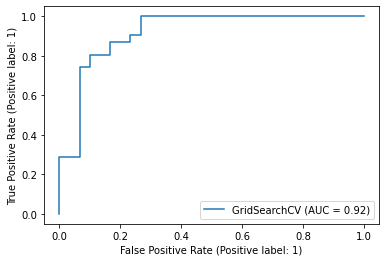

In [52]:
#Plot ROC_curve and calculate AUC
plot_roc_curve(gs_lr, X_test, y_test);

In [53]:
# COnnfusion matrix
print(confusion_matrix(y_test, y_preds))

[[22  8]
 [ 3 28]]


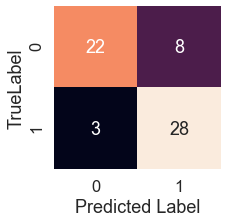

In [54]:
sns.set(font_scale=1.5)

def  plot_conf_mat(y_test, y_preds):
    """Plots a nice looking confusion matrix using Seaborn's heatmap()"""
    
    fig, ax= plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("TrueLabel")
    
plot_conf_mat(y_test, y_preds)

## Let's get a classification report and crossvalidated precision, recall and f1-score.

In [55]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80        30
           1       0.78      0.90      0.84        31

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



In [56]:
# fig, ax=plt.subplots(figsize=(5,5))
# ax=sns.heatmap(classification_report(y_test, y_preds),
#               anot=True,
#               cbar=False)

### Calculate evaluation metrics using cross-validation
We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using cross_val_Score().

In [57]:
# Check best hyperparameters
gs_lr.best_params_

{'C': 0.615848211066026, 'solver': 'liblinear'}

In [58]:
# Create a new classifier with best parameters
clf = LogisticRegression(C= 0.615848211066026, solver= 'liblinear')

In [59]:
cv_acc = cross_val_score(clf, X, y, cv=5, scoring = 'accuracy')
cv_acc=np.mean(cv_acc)
cv_acc

0.8249180327868852

In [60]:
cv_prec = cross_val_score(clf, X,y, cv=5, scoring= 'precision')
cv_prec= np.mean(cv_prec)
cv_prec

0.8122549019607843

In [61]:
cv_recall = cross_val_score(clf, X, y, cv=5, scoring = 'recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.890909090909091

In [62]:
cv_f1score = cross_val_score(clf , X, y, cv=5, scoring = 'f1')
cv_f1score = np.mean(cv_f1score)
cv_f1score

0.8481221874318333

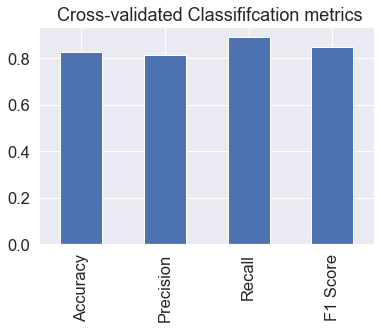

In [63]:
# Visualise our cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc, 
                         "Precision":cv_prec,
                         "Recall":cv_recall,
                         "F1 Score": cv_f1score}, index=[0])
cv_metrics.T.plot.bar(title=" Cross-validated Classififcation metrics",
                     legend=False);

### Feature importance

Feature importance is another as asking, "which features contributed nost to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model.

In [64]:
#Fit an instance of LogisticRegression
gs_lr.best_params_
clf = LogisticRegression(C = 0.615848211066026, solver = "liblinear" )
clf.fit(X_train, y_train);

In [65]:
df.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [66]:
# Check coef_
clf.coef_

array([[ 0.01421679, -1.2455105 ,  0.73157066, -0.01892459, -0.00187899,
        -0.32317928,  0.26308441,  0.03111024, -0.84542997, -0.46036912,
         0.35585528, -0.60647901, -0.7956904 ]])

In [67]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.014216785241903618,
 'sex': -1.2455104953483442,
 'cp': 0.7315706580452764,
 'trestbps': -0.01892459498879159,
 'chol': -0.001878991316754601,
 'fbs': -0.32317927537838437,
 'restecg': 0.26308440557739055,
 'thalach': 0.031110242494380776,
 'exang': -0.8454299718880469,
 'oldpeak': -0.4603691240103923,
 'slope': 0.35585527745564444,
 'ca': -0.6064790115949767,
 'thal': -0.795690403151245}

<AxesSubplot:title={'center':'Feature Importance'}>

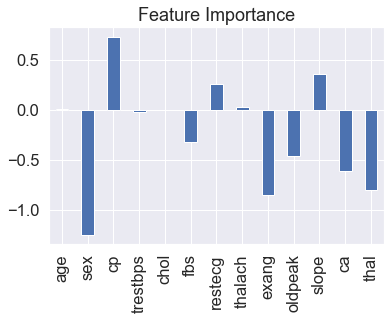

In [68]:
#Visualise feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False)

In [69]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [70]:
pd.crosstab(df.slope, df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
